# Azure Cognitiveサービス

AIによる認知機能をAPIとして提供するMicrosoftのWebサービス群。ここでは顔認識のAPIを利用する。


## Face API

画像から顔認識し、さまざまな属性情報（性別・年齢・感情など）の推定値を返すAPI。
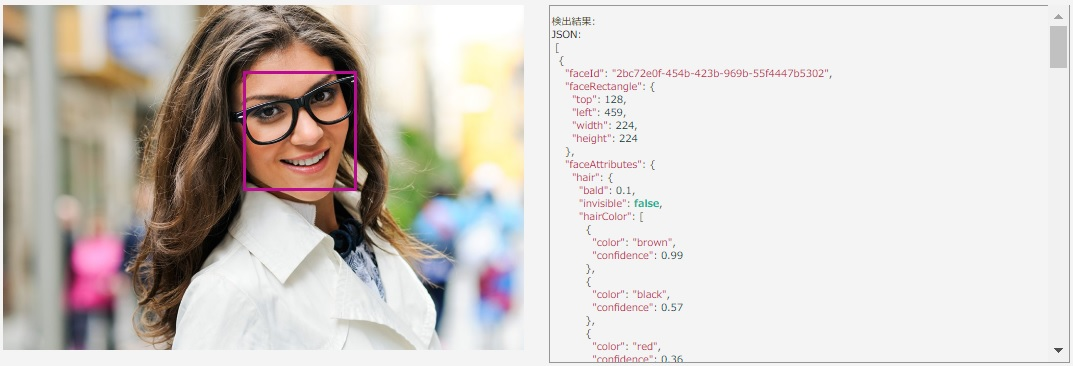
( https://azure.microsoft.com/ja-jp/services/cognitive-services/face/ から引用)

## 利用の開始登録
次の手順に従って、Faceサービスの利用開始登録

1. https://azure.microsoft.com/ja-jp/try/cognitive-services/
2. 「Face」の項目の「APIキーの取得」をクリック
3. ゲストの7日間の試用期間の「開始する」をクリック
4. サービス条件の同意にチェックを付け、国とリージョンに「日本」を選択し、「次へ」をクリック
5. 使用したいアカウントは「Microsoft」を選択し、サインイン
6. 画面に表示されるキー1またはキー2を控えておく

---


## Face APIの利用
以下、具体的なプログラミングを実施していきます。

### ライブラリのロード・設定
必要なライブラリのロードおよび設定をします。

In [1]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO
from IPython.core.display import HTML
import base64
%matplotlib inline

### subscription_keyの設定

上記で入手したキーをsubscription_keyとして保存。


In [9]:
subscription_key = 'dc397cd57e0a4c1abda2acec70fb242f'

### APIのURI
Face APIのURIを指定します。


In [3]:
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'


### カメラ撮影用HTMLを読み込む
以下のコードでカメラ撮影用のHTMLを読み込みます。

In [38]:
display(HTML(filename='camera.html'))

カメラが起動できません．,


### HTMLからの画像データ取り込み
以下のコードで画像を読み込みます。

上記のHTMLの撮影ボタンを押して新しい画像を撮影したら、このコードを実行して画像データを再読込。

In [39]:
image_data = base64.b64decode(encodedImage.split(",")[-1])

### Face APIの呼び出し

Face APIではヘッダとパラメータに以下の値を設定し上記のFace APIのURIに画像データをPOSTすることで呼び出します。

- ヘッダ
  - Content-Type
    - application/octet-stream
  - Ocp-Apim-Subscription-Key
    - subscription_key (取得したアプリケーションキー)
- パラメータ
  - returnFaceAttributes
    - 取得したい属性情報を列挙する。下記の例は取得できる全ての属性を指定しています。各属性の説明はhttps://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236 を参照。

ここでは以下のようにheadersとparams変数を設定しましょう。


In [40]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

そして以下のようにAPIを呼び出すと、faces変数に認識結果が返ってきます。画像中に複数顔がある場合は、認識できた顔のデータ全てが返ってきます。


In [41]:
response = requests.post(
    face_api_url, params=params, headers=headers, data=image_data)
faces = response.json()

### 結果を確認
facesから値を取り出し、認識した顔の属性情報を確認することが出来ます。


In [42]:
face = faces[0]                # 一人目の顔情報を取り出す。もし顔が認識されていなかったらエラー
fa = face["faceAttributes"]    # 属性情報を取り出す
# 以下、各属性情報を表示
print("Age: ", fa["age"])
print("Gender:", fa["gender"])
print("Emotion:", fa["emotion"])
print("Hair:", fa["hair"])

Age:  24.0
Gender: male
Emotion: {'anger': 0.0, 'contempt': 0.01, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.167, 'sadness': 0.824, 'surprise': 0.0}
Hair: {'bald': 0.17, 'invisible': False, 'hairColor': [{'color': 'black', 'confidence': 0.99}, {'color': 'brown', 'confidence': 0.72}, {'color': 'other', 'confidence': 0.5}, {'color': 'gray', 'confidence': 0.4}, {'color': 'blond', 'confidence': 0.09}, {'color': 'red', 'confidence': 0.06}]}


### 元画像にオーバラップして表示
以下のようなコードを書くと元画像にオーバラップして性別・年齢の情報を表示できます。ここでのコードの意味は、興味ある人は調べてみよう。


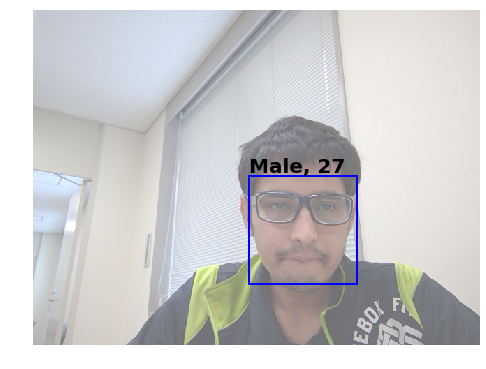

In [31]:
image = Image.open(BytesIO(image_data))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")